In [36]:
from pyspark.sql import SparkSession

# Инициализация Spark
spark = SparkSession.builder \
    .appName("Data Analysis") \
    .config("spark.some.config.option", "some-value") \
    .getOrCreate()


In [37]:
# Загрузка набора данных в Spark DataFrame
data_path = "qwq.csv"
df = spark.read.csv(data_path, header=True, inferSchema=True)


In [38]:
# Отображение схемы и базовой статистики
df.printSchema()
df.describe().show()


root
 |-- FUND TYPE: string (nullable = true)
 |-- DEPARTMENT CODE: integer (nullable = true)
 |-- DEPARTMENT DESCRIPTION: string (nullable = true)
 |-- FUND CODE: string (nullable = true)
 |-- FUND DESCRIPTION: string (nullable = true)
 |-- ORGANIZATION CODE: integer (nullable = true)
 |-- ORGANIZATION DESCRIPTION: string (nullable = true)
 |-- DIVISION CODE: integer (nullable = true)
 |-- DIVISION DESCRIPTION: string (nullable = true)
 |-- SECTION CODE: integer (nullable = true)
 |-- SECTION DESCRIPTION: string (nullable = true)
 |-- SUB-SECTION CODE: integer (nullable = true)
 |-- SUB-SECTION DESCRIPTION: string (nullable = true)
 |-- SCHEDULE / GRADE: string (nullable = true)
 |-- BARGAINING UNIT: integer (nullable = true)
 |-- TITLE CODE: string (nullable = true)
 |-- TITLE DESCRIPTION: string (nullable = true)
 |-- BUDGETED UNIT: string (nullable = true)
 |-- TOTAL BUDGETED UNIT: integer (nullable = true)
 |-- POSITION CONTROL: integer (nullable = true)
 |-- BUDGETED PAY RATE: do

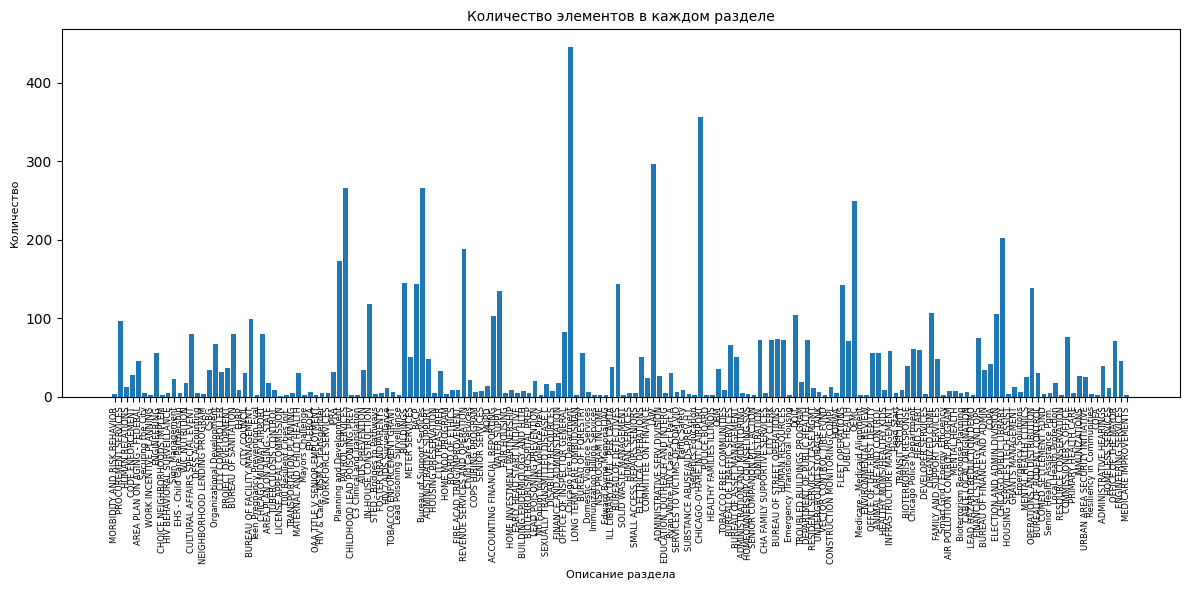

In [34]:
import matplotlib.pyplot as plt

#Количество элементов в каждом разделе
division_count = df.groupBy("DIVISION DESCRIPTION").count().toPandas()
# Визуализация с читаемыми подписями на оси X
plt.figure(figsize=(12, 6))
plt.bar(division_count["DIVISION DESCRIPTION"], division_count["count"])
plt.xlabel("Описание раздела", fontsize=8)
plt.ylabel("Количество", fontsize=8)
plt.title("Количество элементов в каждом разделе", fontsize=10)
plt.xticks(rotation=90, fontsize=6, ha='center')
plt.tight_layout()  # Чтобы избежать наложения текста
plt.show()



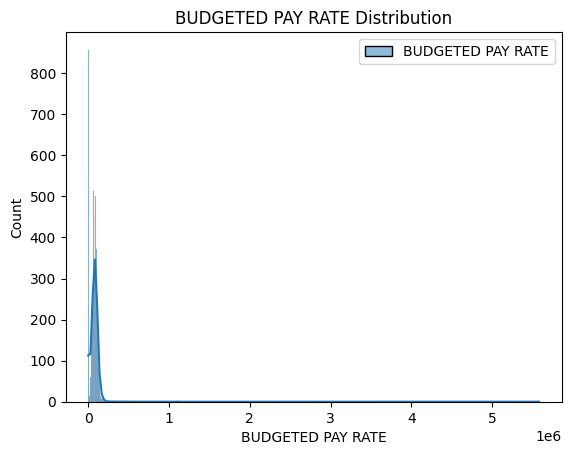

In [28]:
import seaborn as sns

# Распределение BUDGETED PAY RATE
sns.histplot(df.select("BUDGETED PAY RATE").toPandas(), kde=True)
plt.title("BUDGETED PAY RATE Distribution")
plt.xlabel("BUDGETED PAY RATE")
plt.show()



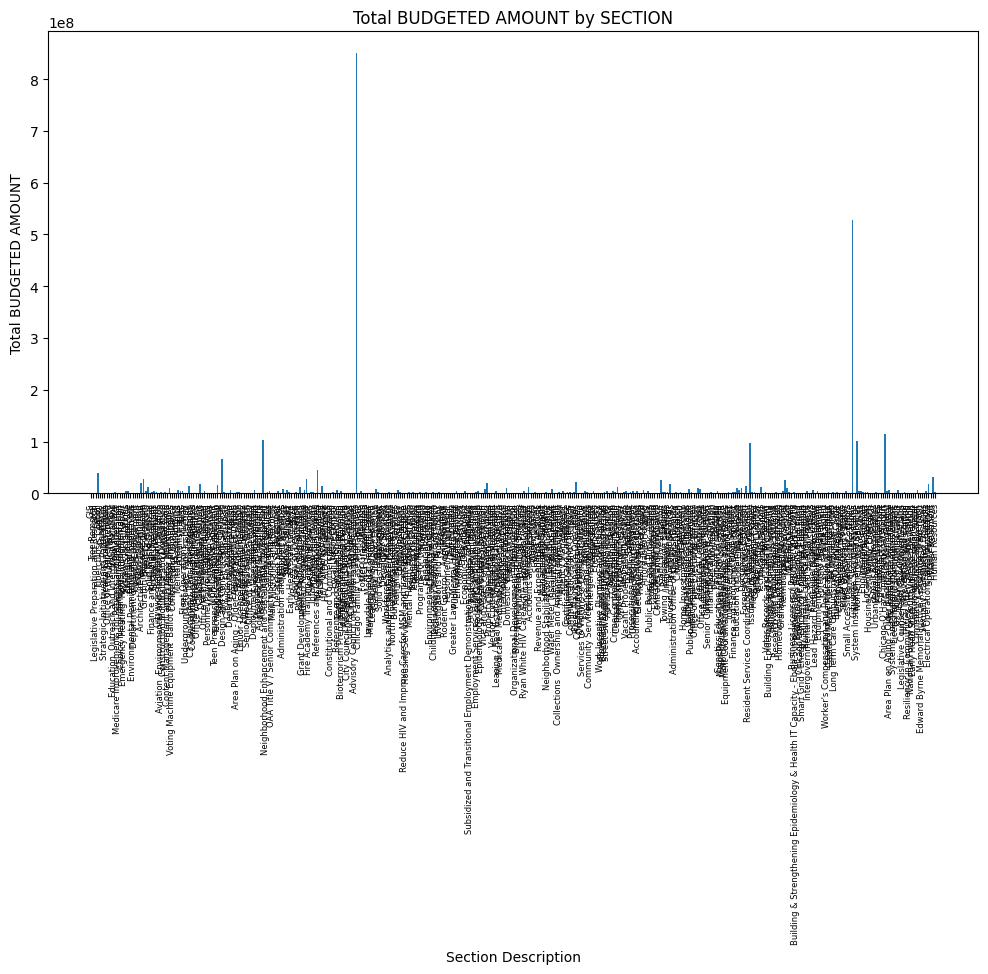

In [35]:
# Общая сумма BUDGETED AMOUNT 
total_amount_by_section = df.groupBy("SECTION DESCRIPTION").sum("TOTAL BUDGETED AMOUNT").toPandas()

# Визуализация
plt.figure(figsize=(12, 6))
plt.bar(total_amount_by_section["SECTION DESCRIPTION"], total_amount_by_section["sum(TOTAL BUDGETED AMOUNT)"])
plt.xlabel("Section Description")
plt.ylabel("Total BUDGETED AMOUNT")
plt.title("Total BUDGETED AMOUNT by SECTION")
plt.xticks(rotation=90, fontsize=6, ha='center')
plt.show()


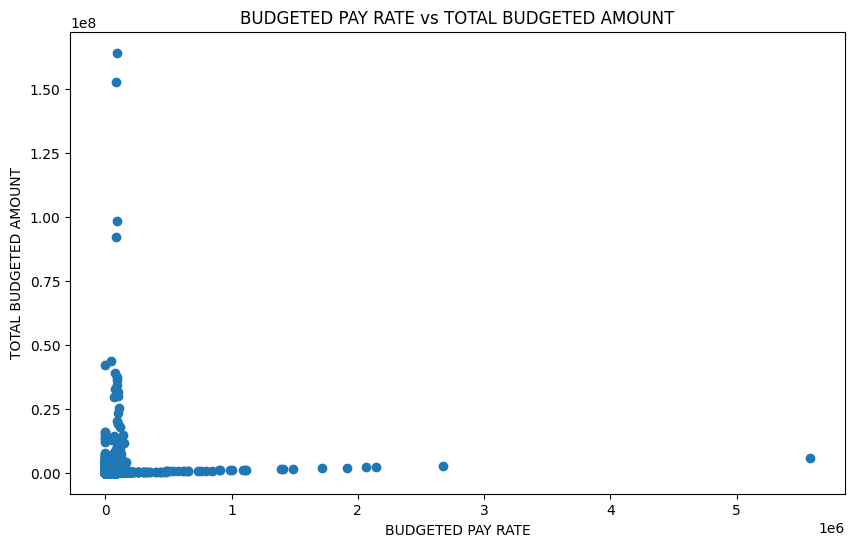

In [30]:
# Диаграмма рассеяния BUDGETED PAY RATE vs TOTAL BUDGETED AMOUNT
scatter_data = df.select("BUDGETED PAY RATE", "TOTAL BUDGETED AMOUNT").toPandas()

# Визуализация
plt.figure(figsize=(10, 6))
plt.scatter(scatter_data["BUDGETED PAY RATE"], scatter_data["TOTAL BUDGETED AMOUNT"])
plt.title("BUDGETED PAY RATE vs TOTAL BUDGETED AMOUNT")
plt.xlabel("BUDGETED PAY RATE")
plt.ylabel("TOTAL BUDGETED AMOUNT")
plt.show()
